In [8]:
!python -m pip install scikit-image;






[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
!python -m pip install numpy as np;


ERROR: Could not find a version that satisfies the requirement as (from versions: none)

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for as


In [2]:

from skimage.feature import graycomatrix, graycoprops
import numpy as np
from PIL import Image

def calculate_glcm_contrast(image_path):
  """Calculates the contrast feature of the GLCM for a given image.

  Args:
    image_path: The path to the image file.

  Returns:
    The contrast value from the GLCM, or None if an error occurs.
  """
  try:
    # Open the image using Pillow library & Convert to grayscale
    img = Image.open(image_path).convert('L')

    # Convert the image to a NumPy array
    image_array = np.array(img)

    # Calculate the GLCM
    glcm = graycomatrix(image_array, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)


    contrast = graycoprops(glcm, 'contrast')[0, 0]

    return contrast

  except FileNotFoundError:
    print(f"Error: Image file not found at {image_path}")
    return None
  except Exception as e:
    print(f"An error occurred: {e}")
    return None


# Example Usage
#image_path = 'https://i.ibb.co/G4dG8s3K/IMG-20250301-172740046-HDR.jpg'  # Replace with your image path
contrast_value = calculate_glcm_contrast(image_path)

if contrast_value is not None:
  print(f"GLCM Contrast: {contrast_value}")


NameError: name 'image_path' is not defined

In [3]:
from skimage.feature import graycomatrix, graycoprops
import numpy as np
from PIL import Image
import requests
from io import BytesIO

def calculate_glcm_contrast(image_path):
    """Calculates the contrast feature of the GLCM for a given image (local path or URL)."""
    try:
        # Check if the path is a URL
        if image_path.startswith(('http://', 'https://')):
            # Download the image from the URL
            response = requests.get(image_path)
            response.raise_for_status()  # Raise error for bad status codes
            img = Image.open(BytesIO(response.content)).convert('L')  # Convert to grayscale
        else:
            # Open local image
            img = Image.open(image_path).convert('L')

        image_array = np.array(img)
        glcm = graycomatrix(image_array, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
        contrast = graycoprops(glcm, 'contrast')[0, 0]
        return contrast

    except Exception as e:
        print(f"Error: {e}")
        return None

# Example Usage
#image_url = 'https://i.ibb.co/G4dG8s3K/IMG-20250301-172740046-HDR.jpg'  # Replace with a valid URL
#contrast_value = calculate_glcm_contrast(image_url)

#if contrast_value is not None:
    #print(f"GLCM Contrast: [contrast_value}")


In [ ]:
# Example Usage
image_url = 'https://i.postimg.cc/dVn8QQVx/Whats-App-Image-2025-03-01-at-5-41-25-PM.jpg'  # Replace with a valid URL
contrast_value = calculate_glcm_contrast(image_url)

if contrast_value is not None:
    print(f"GLCM Contrast: {contrast_value}")

GLCM Contrast: 180.17513687150839


In [2]:
!python -m pip install numpy
import numpy as np

np.digitize([[2,3,4,6,7],[3,5,82,34,2]],np.linspace(2,82, 10 + 1))


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


array([[ 1,  1,  1,  1,  1],
       [ 1,  1, 11,  5,  1]], dtype=int64)

In [13]:
np.linspace(2,82,10+1) #Checking whether linspace is the same as function I wrote

array([ 2., 10., 18., 26., 34., 42., 50., 58., 66., 74., 82.])

In [6]:
!python -m pip install opencv-python


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
import cv2
import numpy as np
def fast_glcm(img, vmin=0, vmax=255, nbit=8, kernel_size=5):
    mi, ma = vmin, vmax
    ks = kernel_size
    h,w = img.shape

    # digitize
    bins = np.linspace(mi, ma+1, nbit+1)
    gl1 = np.digitize(img, bins) - 1
    print(f"{gl1} After digitize #1")
    gl2 = np.append(gl1[:,1:], gl1[:,-1:], axis=1)

    print(f"{gl2} After digitize #2")
    # make glcm
    glcm = np.zeros((nbit, nbit, h, w), dtype=np.uint8)
    for i in range(nbit):
        for j in range(nbit):
            mask = ((gl1==i) & (gl2==j))
            glcm[i,j, mask] = 1

    kernel = np.ones((ks, ks), dtype=np.uint8)
    for i in range(nbit):
        for j in range(nbit):
            glcm[i,j] = cv2.filter2D(glcm[i,j], -1, kernel)

    glcm = glcm.astype(np.float32)
    return glcm

print(fast_glcm(np.array([[2,3,4,6,7],[3,5,82,34,2], [ 2, 3, 7, 5, 8] ,  [15, 71, 23, 45, 67] , [ 2, 56, 7, 89, 1 ]]), vmin=2, vmax=83, nbit=10, kernel_size=3))

[[ 0  0  0  0  0]
 [ 0  0  9  3  0]
 [ 0  0  0  0  0]
 [ 1  8  2  5  7]
 [ 0  6  0 10 -1]] After digitize #1
[[ 0  0  0  0  0]
 [ 0  9  3  0  0]
 [ 0  0  0  0  0]
 [ 8  2  5  7  7]
 [ 6  0 10 -1 -1]] After digitize #2
[[[[5. 5. 3. 5. 5.]
   [7. 7. 6. 7. 7.]
   [4. 4. 3. 4. 4.]
   [3. 3. 3. 3. 3.]
   [0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]

  ...

  [[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]

  [[4. 2. 2. 0. 0.]
   [2. 1. 1. 0. 0.]
   [2. 1. 1. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]]


 [[[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]

In [15]:
np.linspace(2,56,4)


array([ 2., 20., 38., 56.])

In [4]:
np.linspace(2,34,10)

array([ 2.        ,  5.55555556,  9.11111111, 12.66666667, 16.22222222,
       19.77777778, 23.33333333, 26.88888889, 30.44444444, 34.        ])

In [5]:
np.digitize([[1,3,4,6,7],[3,5,24,34,2]],np.linspace(2,34, 10))



array([[ 0,  1,  1,  2,  2],
       [ 1,  1,  7, 10,  1]], dtype=int64)

In [16]:
import numpy as np

# GLCM Low Contrast Matrix (values close to each other)
glcm_low_contrast = np.array([
    [10, 12, 11, 10, 12, 11, 10, 12, 11, 10, 12, 11, 10, 12, 11],
    [12, 11, 10, 12, 11, 10, 12, 11, 10, 12, 11, 10, 12, 11, 10],
    [11, 10, 12, 11, 10, 12, 11, 10, 12, 11, 10, 12, 11, 10, 12],
    [10, 12, 11, 10, 12, 11, 10, 12, 11, 10, 12, 11, 10, 12, 11],
    [12, 11, 10, 12, 11, 10, 12, 11, 10, 12, 11, 10, 12, 11, 10],
    [11, 10, 12, 11, 10, 12, 11, 10, 12, 11, 10, 12, 11, 10, 12],
    [10, 12, 11, 10, 12, 11, 10, 12, 11, 10, 12, 11, 10, 12, 11],
    [12, 11, 10, 12, 11, 10, 12, 11, 10, 12, 11, 10, 12, 11, 10],
    [11, 10, 12, 11, 10, 12, 11, 10, 12, 11, 10, 12, 11, 10, 12],
    [10, 12, 11, 10, 12, 11, 10, 12, 11, 10, 12, 11, 10, 12, 11],
    [12, 11, 10, 12, 11, 10, 12, 11, 10, 12, 11, 10, 12, 11, 10],
    [11, 10, 12, 11, 10, 12, 11, 10, 12, 11, 10, 12, 11, 10, 12],
    [10, 12, 11, 10, 12, 11, 10, 12, 11, 10, 12, 11, 10, 12, 11],
    [12, 11, 10, 12, 11, 10, 12, 11, 10, 12, 11, 10, 12, 11, 10],
    [11, 10, 12, 11, 10, 12, 11, 10, 12, 11, 10, 12, 11, 10, 12]
])

# GLCM High Contrast Matrix (values far apart)
glcm_high_contrast = np.array([
    [0, 255, 0, 255, 0, 255, 0, 255, 0, 255, 0, 255, 0, 255, 0],
    [255, 0, 255, 0, 255, 0, 255, 0, 255, 0, 255, 0, 255, 0, 255],
    [0, 255, 0, 255, 0, 255, 0, 255, 0, 255, 0, 255, 0, 255, 0],
    [255, 0, 255, 0, 255, 0, 255, 0, 255, 0, 255, 0, 255, 0, 255],
    [0, 255, 0, 255, 0, 255, 0, 255, 0, 255, 0, 255, 0, 255, 0],
    [255, 0, 255, 0, 255, 0, 255, 0, 255, 0, 255, 0, 255, 0, 255],
    [0, 255, 0, 255, 0, 255, 0, 255, 0, 255, 0, 255, 0, 255, 0],
    [255, 0, 255, 0, 255, 0, 255, 0, 255, 0, 255, 0, 255, 0, 255],
    [0, 255, 0, 255, 0, 255, 0, 255, 0, 255, 0, 255, 0, 255, 0],
    [255, 0, 255, 0, 255, 0, 255, 0, 255, 0, 255, 0, 255, 0, 255],
    [0, 255, 0, 255, 0, 255, 0, 255, 0, 255, 0, 255, 0, 255, 0],
    [255, 0, 255, 0, 255, 0, 255, 0, 255, 0, 255, 0, 255, 0, 255],
    [0, 255, 0, 255, 0, 255, 0, 255, 0, 255, 0, 255, 0, 255, 0],
    [255, 0, 255, 0, 255, 0, 255, 0, 255, 0, 255, 0, 255, 0, 255],
    [0, 255, 0, 255, 0, 255, 0, 255, 0, 255, 0, 255, 0, 255, 0]
])

# Print the matrices
print("GLCM Low Contrast Matrix:")
print(calculate_glcm_contrast(glcm_low_contrast))

print("\nGLCM High Contrast Matrix:")
print(calculate_glcm_contrast(glcm_high_contrast))

GLCM Low Contrast Matrix:
An error occurred: 'numpy.ndarray' object has no attribute 'read'
None

GLCM High Contrast Matrix:
An error occurred: 'numpy.ndarray' object has no attribute 'read'
None


In [12]:
calculate_glcm_contrast('Low_Contrast.png')

248.35575384615385

In [13]:
calculate_glcm_contrast('High_Contrast.png')

3454.4025022935057

In [6]:
from skimage.feature import graycomatrix, graycoprops
test_matrix = [[50, 200, 60, 180, 70, 160, 80, 140, 90, 120, 100, 110, 105, 115, 125],
    [200, 50, 180, 60, 160, 70, 140, 80, 120, 90, 110, 100, 115, 105, 125],
    [60, 180, 50, 200, 70, 160, 80, 140, 90, 120, 100, 110, 105, 115, 125],
    [180, 60, 200, 50, 160, 70, 140, 80, 120, 90, 110, 100, 115, 105, 125],
    [70, 160, 80, 140, 50, 200, 90, 120, 60, 180, 100, 110, 105, 115, 125],
    [160, 70, 140, 80, 200, 50, 120, 90, 180, 60, 110, 100, 115, 105, 125],
    [80, 140, 90, 120, 60, 180, 50, 200, 70, 160, 100, 110, 105, 115, 125],
    [140, 80, 120, 90, 180, 60, 200, 50, 160, 70, 110, 100, 115, 105, 125],
    [90, 120, 100, 110, 105, 115, 125, 50, 200, 60, 180, 70, 160, 80, 140],
    [120, 90, 110, 100, 115, 105, 125, 200, 50, 180, 60, 160, 70, 140, 80],
    [100, 110, 105, 115, 125, 50, 200, 60, 180, 70, 160, 80, 140, 90, 120],
    [110, 100, 115, 105, 125, 200, 50, 180, 60, 160, 70, 140, 80, 120, 90],
    [105, 115, 125, 50, 200, 60, 180, 70, 160, 80, 140, 90, 120, 100, 110],
    [115, 105, 125, 200, 50, 180, 60, 160, 70, 140, 80, 120, 90, 110, 100],
    [125, 50, 200, 60, 180, 70, 160, 80, 140, 90, 120, 100, 110, 105, 115]]
graycoprops(graycomatrix(test_matrix, distances=[1], angles=[0], levels=256, symmetric=True, normed=True), 'contrast')[0, 0]

6499.047619047619

In [13]:
test_matrix2 = [
    [10, 12, 11, 10, 12, 11, 10, 12, 11, 10, 12, 11, 10, 12, 11],
    [12, 11, 10, 12, 11, 10, 12, 11, 10, 12, 11, 10, 12, 11, 10],
    [11, 10, 12, 11, 10, 12, 11, 10, 12, 11, 10, 12, 11, 10, 12],
    [10, 12, 11, 10, 12, 11, 10, 12, 11, 10, 12, 11, 10, 12, 11],
    [12, 11, 10, 12, 11, 10, 12, 11, 10, 12, 11, 10, 12, 11, 10],
    [11, 10, 12, 11, 10, 12, 11, 10, 12, 11, 10, 12, 11, 10, 12],
    [10, 12, 11, 10, 12, 11, 10, 12, 11, 10, 12, 11, 10, 12, 11],
    [12, 11, 10, 12, 11, 10, 12, 11, 10, 12, 11, 10, 12, 11, 10],
    [11, 10, 12, 11, 10, 12, 11, 10, 12, 11, 10, 12, 11, 10, 12],
    [10, 12, 11, 10, 12, 11, 10, 12, 11, 10, 12, 11, 10, 12, 11],
    [12, 11, 10, 12, 11, 10, 12, 11, 10, 12, 11, 10, 12, 11, 10],
    [11, 10, 12, 11, 10, 12, 11, 10, 12, 11, 10, 12, 11, 10, 12],
    [10, 12, 11, 10, 12, 11, 10, 12, 11, 10, 12, 11, 10, 12, 11],
    [12, 11, 10, 12, 11, 10, 12, 11, 10, 12, 11, 10, 12, 11, 10],
    [11, 10, 12, 11, 10, 12, 11, 10, 12, 11, 10, 12, 11, 10, 12]
]

print(graycoprops(graycomatrix(test_matrix2, distances=[1], angles=[0], levels=256, symmetric=True, normed=True), 'contrast')[0][0])


1.9999999999999998


In [4]:
calculate_glcm_contrast('Sample_Images/1.png')

12.2649388891693

In [5]:
calculate_glcm_contrast('Sample_Images/9.jpg')


1673.158264987224

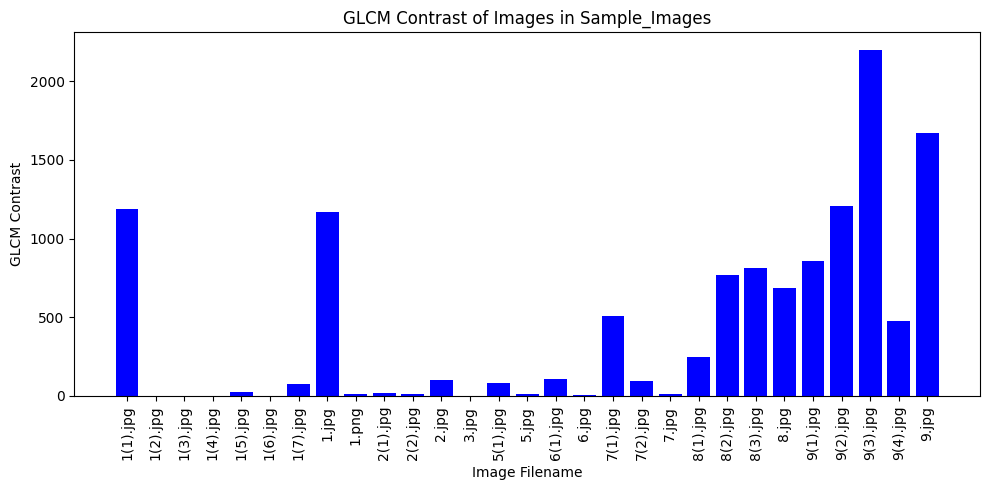

In [8]:
import os

import matplotlib.pyplot as plt

# Directory containing the sample images
image_dir = 'Sample_Images'

# List to store the results
results = []

# Iterate over all files in the directory
for filename in os.listdir(image_dir):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        image_path = os.path.join(image_dir, filename)
        contrast_value = calculate_glcm_contrast(image_path)
        if contrast_value is not None:
            results.append((filename, contrast_value))

# Sort results by filename
results.sort(key=lambda x: x[0])

# Separate filenames and contrast values
filenames, contrast_values = zip(*results)

# Plot the results
plt.figure(figsize=(10, 5))
plt.bar(filenames, contrast_values, color='blue')
plt.xlabel('Image Filename')
plt.ylabel('GLCM Contrast')
plt.title('GLCM Contrast of Images in Sample_Images')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [11]:
!python -m pip install scikit-learn

  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------- ----------------------------- 2.9/11.1 MB 18.6 MB/s eta 0:00:01
   --------------------------- ------------ 7.6/11.1 MB 20.4 MB/s eta 0:00:01
   ---------------------------------------  11.0/11.1 MB 19.6 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 18.8 MB/s eta 0:00:00
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


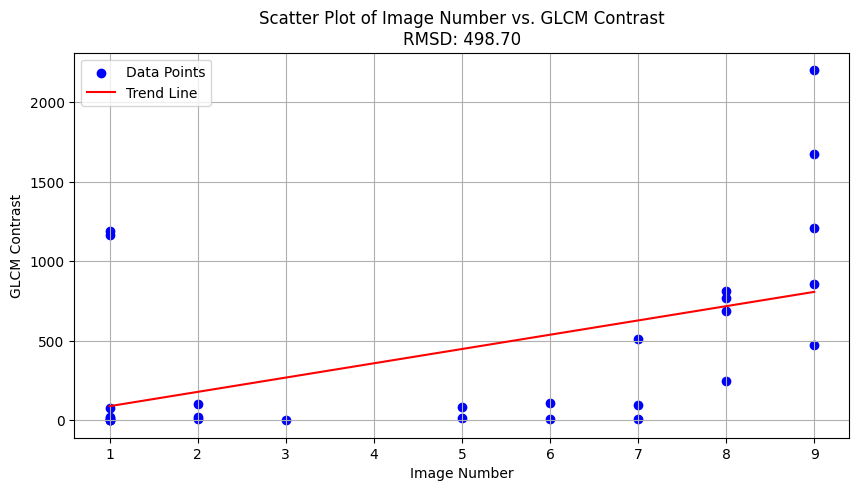

In [16]:
import numpy as np
import re
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt

# Extract the number from the filenames
image_numbers = [int(re.search(r'(\d+)(?!\))', filename).group(1)) for filename in filenames]

# Convert to numpy arrays for linear regression
image_numbers_np = np.array(image_numbers).reshape(-1, 1)
contrast_values_np = np.array(contrast_values)

# Perform linear regression
model = LinearRegression()
model.fit(image_numbers_np, contrast_values_np)
trend_line = model.predict(image_numbers_np)

# Calculate RMSD
rmsd = np.sqrt(np.mean((contrast_values_np - trend_line) ** 2))

# Create the scatter plot with trend line
plt.figure(figsize=(10, 5))
plt.scatter(image_numbers, contrast_values, color='blue', label='Data Points')
plt.plot(image_numbers, trend_line, color='red', label='Trend Line')
plt.xlabel('Image Number')
plt.ylabel('GLCM Contrast')
plt.title(f'Scatter Plot of Image Number vs. GLCM Contrast\nRMSD: {rmsd:.2f}')
plt.legend()
plt.grid(True)
plt.show()

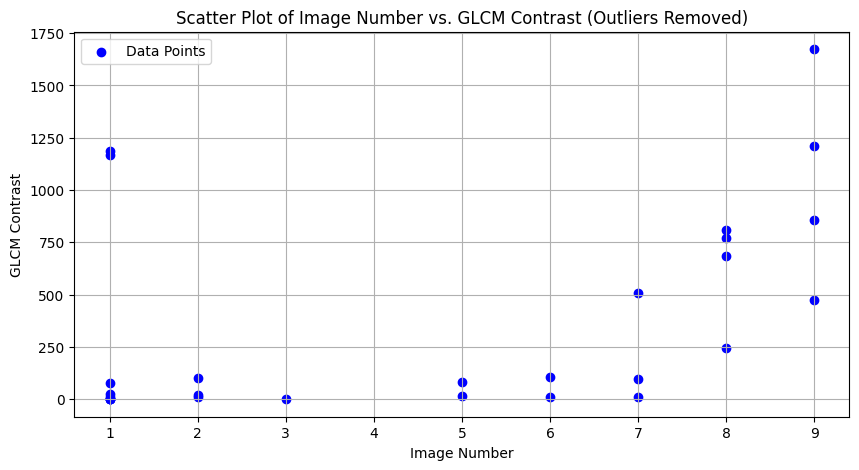

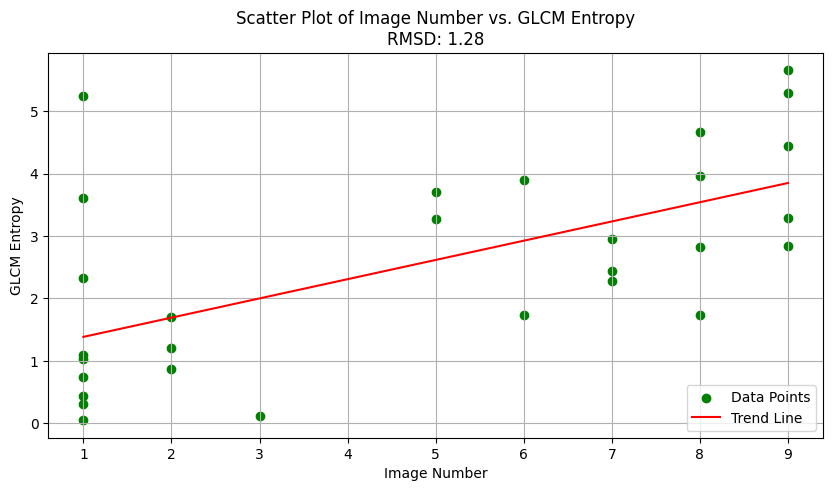

In [20]:
from skimage.measure import shannon_entropy

def calculate_glcm_entropy(image_path):
    """Calculates the entropy feature of the GLCM for a given image (local path or URL)."""
    try:
        # Check if the path is a URL
        if image_path.startswith(('http://', 'https://')):
            # Download the image from the URL
            response = requests.get(image_path)
            response.raise_for_status()  # Raise error for bad status codes
            img = Image.open(BytesIO(response.content)).convert('L')  # Convert to grayscale
        else:
            # Open local image
            img = Image.open(image_path).convert('L')

        image_array = np.array(img)
        glcm = graycomatrix(image_array, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
        entropy = shannon_entropy(glcm)
        return entropy

    except Exception as e:
        print(f"Error: {e}")
        return None

# Calculate entropy for each image
entropy_results = []
for filename in os.listdir(image_dir):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        image_path = os.path.join(image_dir, filename)
        entropy_value = calculate_glcm_entropy(image_path)
        if entropy_value is not None:
            entropy_results.append((filename, entropy_value))

# Sort results by filename
entropy_results.sort(key=lambda x: x[0])

# Separate filenames and entropy values
entropy_filenames, entropy_values = zip(*entropy_results)

# Extract the number from the filenames
entropy_image_numbers = [int(re.search(r'(\d+)(?!\))', filename).group(1)) for filename in entropy_filenames]

# Convert to numpy arrays for linear regression
entropy_image_numbers_np = np.array(entropy_image_numbers).reshape(-1, 1)
entropy_values_np = np.array(entropy_values)

# Perform linear regression
entropy_model = LinearRegression()
entropy_model.fit(entropy_image_numbers_np, entropy_values_np)
entropy_trend_line = entropy_model.predict(entropy_image_numbers_np)

# Calculate RMSD
entropy_rmsd = np.sqrt(np.mean((entropy_values_np - entropy_trend_line) ** 2))

# Create the scatter plot with trend line
plt.figure(figsize=(10, 5))
plt.scatter(entropy_image_numbers, entropy_values, color='green', label='Data Points')
plt.plot(entropy_image_numbers, entropy_trend_line, color='red', label='Trend Line')
plt.xlabel('Image Number')
plt.ylabel('GLCM Entropy')
plt.title(f'Scatter Plot of Image Number vs. GLCM Entropy\nRMSD: {entropy_rmsd:.2f}')
plt.legend()
plt.grid(True)
plt.show()

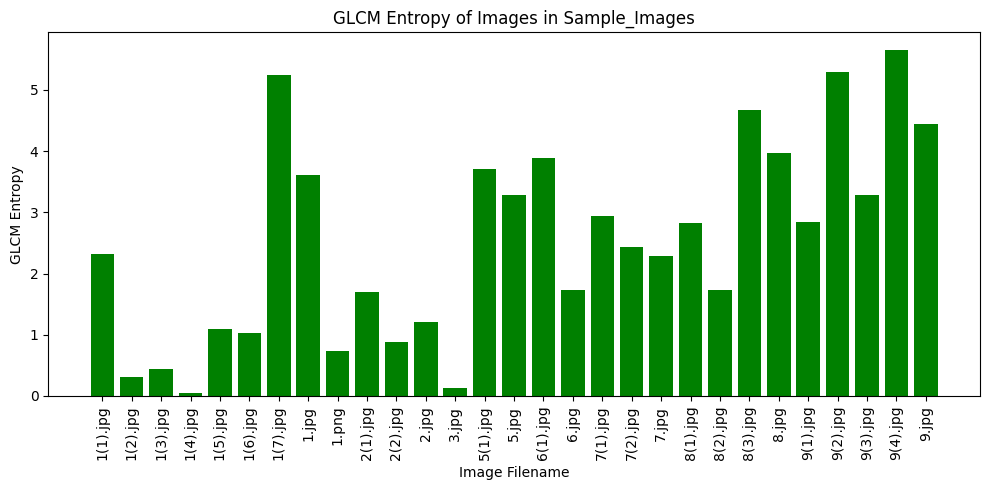

10.351547115460706